In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In this part we will take a look at the distributions of the data and clear all the null values for all four datasets, then we will perform PCA to help us reduce dimensionality.

In [2]:
player_stats = pd.read_csv('player_stats.csv')

We will use the method .head to give us an overview of the player stats dataset.

In [3]:
player_stats.head()

,nbapersonid,player,draftyear,draftpick,season,nbateamid,team,games,games_start,mins,...,blk_pct,tov_pct,usg,OWS,DWS,WS,OBPM,DBPM,BPM,VORP
0,2585,Zaza Pachulia,2003,42.0,2007,1610612737,ATL,62,5,944,...,0.010,0.181,0.183,0.2,0.9,1.1,-3.9,-1.3,-5.1,-0.7
1,200780,Solomon Jones,2006,33.0,2007,1610612737,ATL,35,0,145,...,0.026,0.221,0.156,-0.1,0.1,0.0,-6.7,-2.0,-8.8,-0.2
2,2746,Josh Smith,2004,17.0,2007,1610612737,ATL,81,81,2873,...,0.059,0.155,0.250,1.2,4.6,5.8,0.5,2.5,3.0,3.7
3,201151,Acie Law,2007,11.0,2007,1610612737,ATL,56,6,865,...,0.000,0.178,0.165,-0.5,0.4,-0.1,-4.2,-1.0,-5.2,-0.7
4,101136,Salim Stoudamire,2005,31.0,2007,1610612737,ATL,35,0,402,...,0.009,0.094,0.252,0.1,0.1,0.3,-1.0,-2.5,-3.5,-0.1


Using .describe is a way to visualize some of the statistics.

In [4]:
player_stats.describe()

,nbapersonid,draftyear,draftpick,season,nbateamid,games,games_start,mins,fgm,fga,...,blk_pct,tov_pct,usg,OWS,DWS,WS,OBPM,DBPM,BPM,VORP
count,8.492000e+03,8492.000000,6729.000000,8492.000000,8.492000e+03,8492.000000,8492.000000,8492.000000,8492.000000,8492.000000,...,8492.000000,8447.000000,8492.000000,8492.000000,8492.000000,8492.000000,8492.00000,8492.000000,8492.000000,8492.000000
mean,4.908586e+05,2009.336199,22.226780,2014.354216,1.610613e+09,44.002237,21.065002,1018.417452,162.521785,355.438295,...,0.016733,0.133888,0.185754,1.117840,1.034432,2.153957,-1.58236,-0.238424,-1.820996,0.511034
std,6.379069e+05,6.175973,15.447429,4.373970,8.672910e+00,26.282138,26.800959,847.050644,163.463691,348.255326,...,0.018625,0.069082,0.056566,1.847609,1.091134,2.705429,4.52719,1.996071,5.631339,1.188142
min,1.500000e+01,1991.000000,1.000000,2007.000000,1.610613e+09,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-3.300000,-0.500000,-2.100000,-52.40000,-31.100000,-81.400000,-2.000000
25%,1.011438e+05,2005.000000,9.000000,2011.000000,1.610613e+09,20.000000,0.000000,238.000000,28.000000,67.000000,...,0.005000,0.099000,0.148000,0.000000,0.200000,0.100000,-3.20000,-1.100000,-3.600000,-0.100000
50%,2.023260e+05,2009.000000,20.000000,2014.000000,1.610613e+09,47.000000,6.000000,831.000000,109.000000,245.000000,...,0.011000,0.126000,0.181000,0.400000,0.700000,1.200000,-1.30000,-0.200000,-1.400000,0.100000
75%,2.039920e+05,2014.000000,34.000000,2018.000000,1.610613e+09,68.000000,37.250000,1685.000000,252.000000,553.000000,...,0.023000,0.159000,0.220000,1.700000,1.600000,3.300000,0.40000,0.700000,0.500000,0.700000
max,1.630994e+06,2021.000000,60.000000,2021.000000,1.610613e+09,82.000000,82.000000,3424.000000,857.000000,1941.000000,...,0.379000,1.000000,0.546000,14.800000,7.700000,20.300000,199.40000,42.700000,242.200000,11.800000


We will make a histogram for every feature to check their distributions and see what they look like.

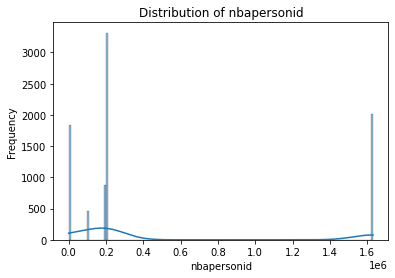

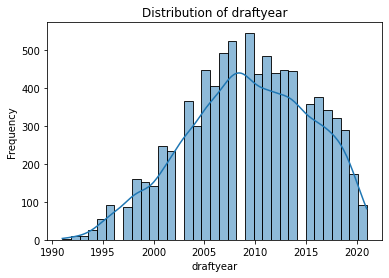

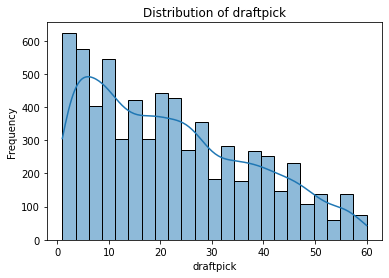

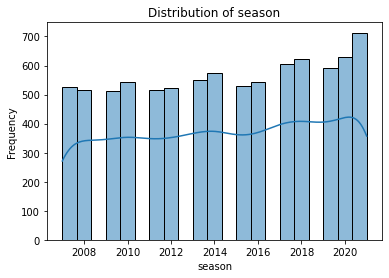

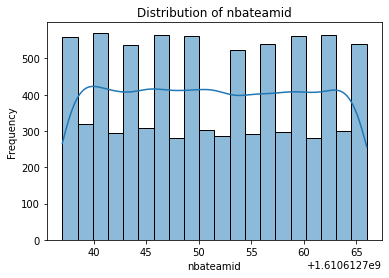

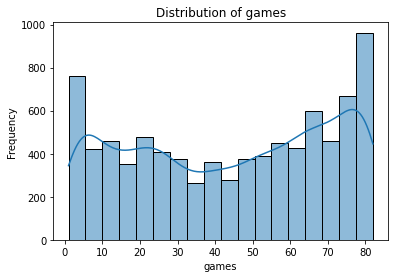

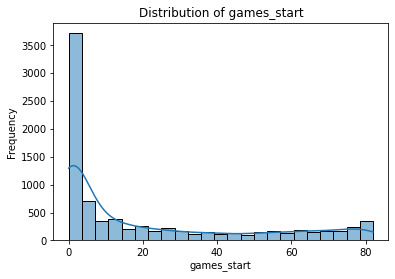

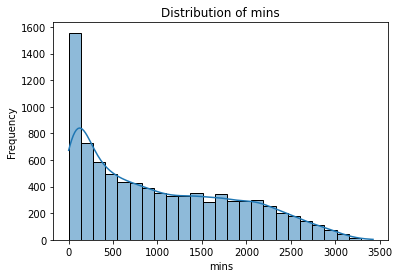

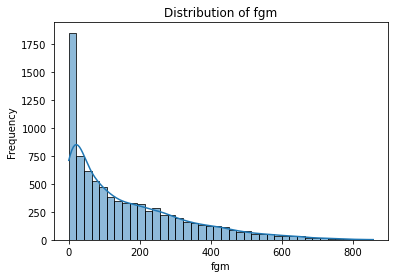

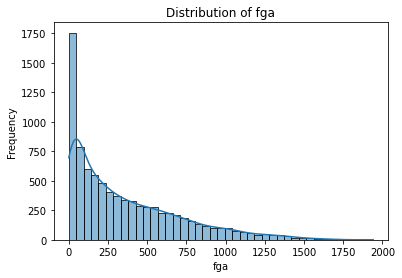

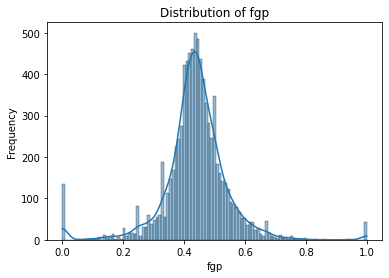

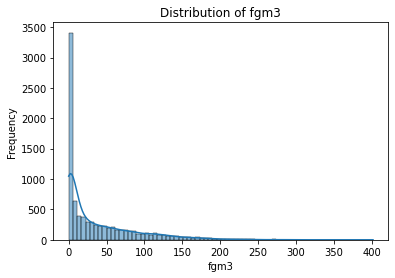

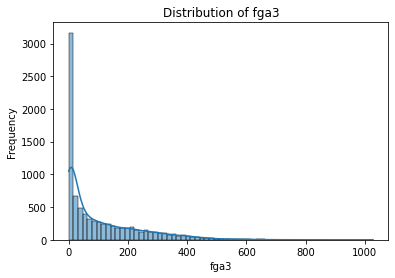

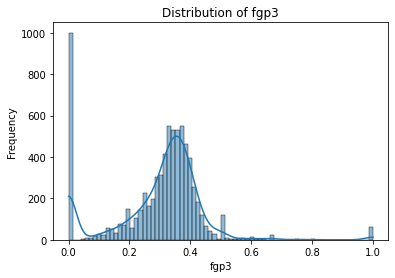

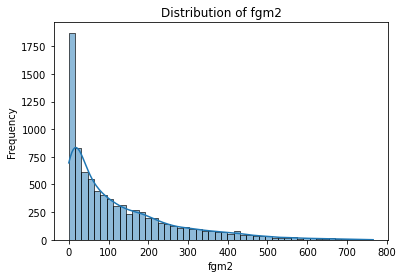

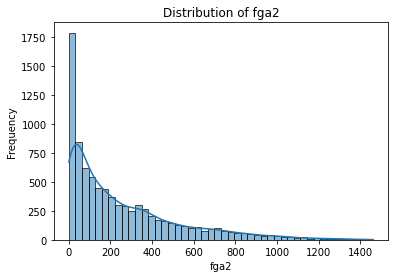

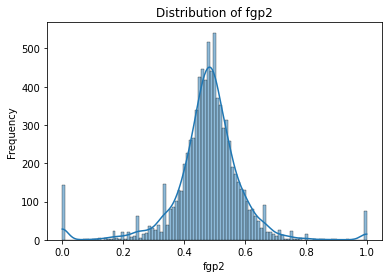

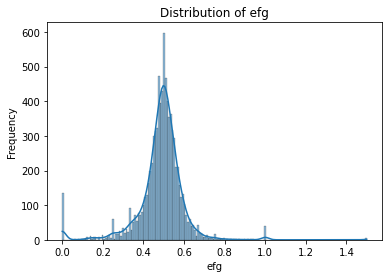

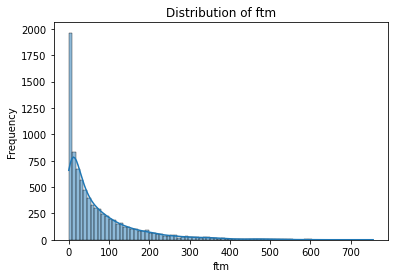

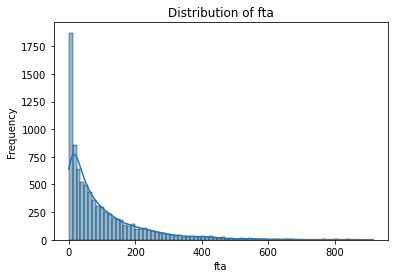

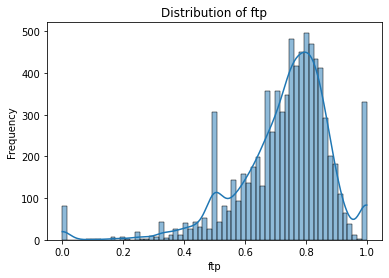

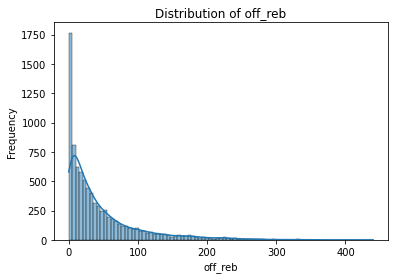

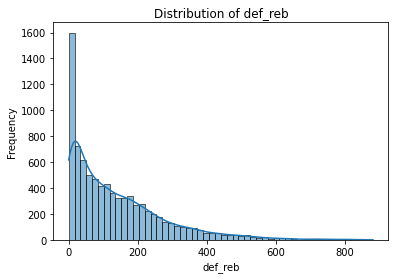

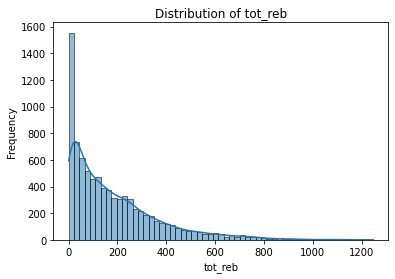

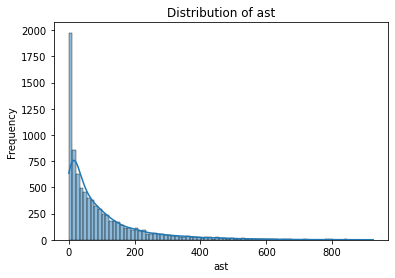

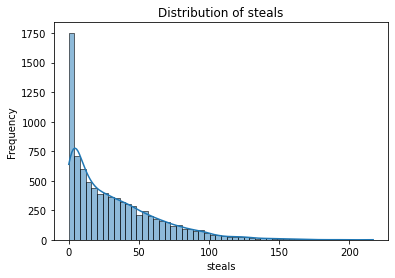

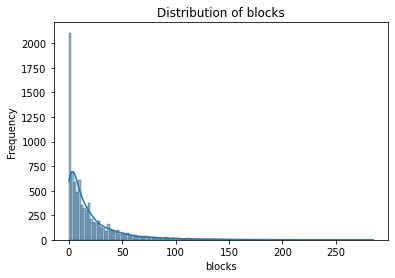

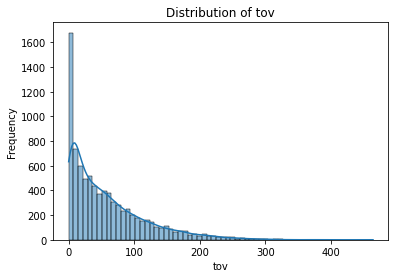

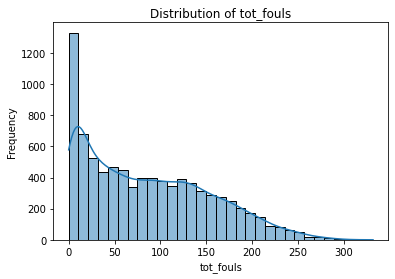

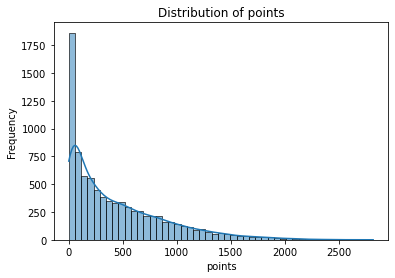

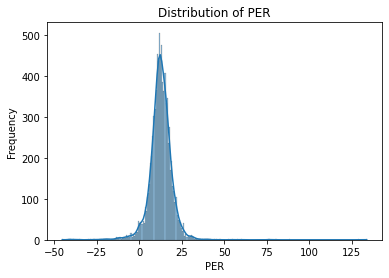

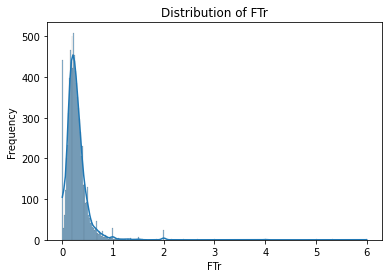

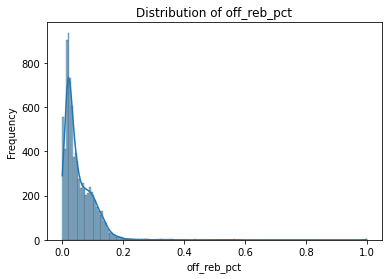

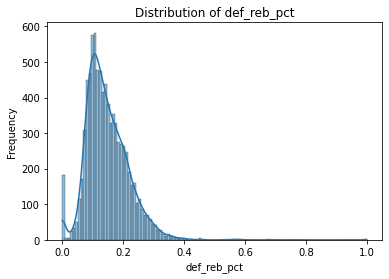

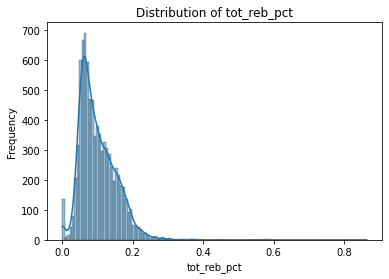

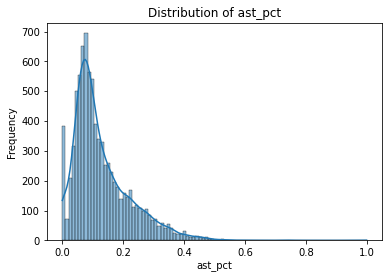

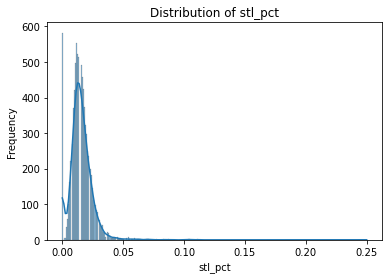

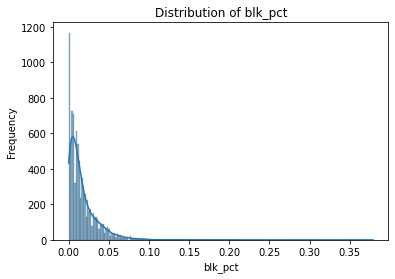

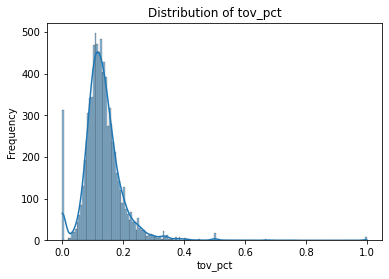

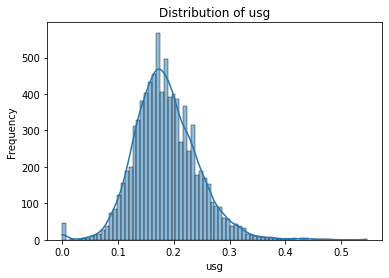

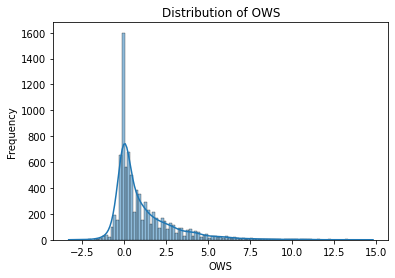

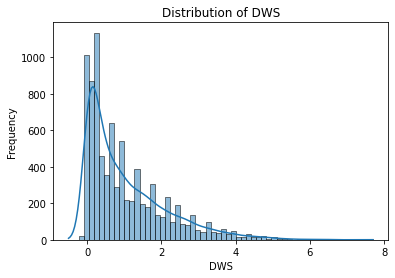

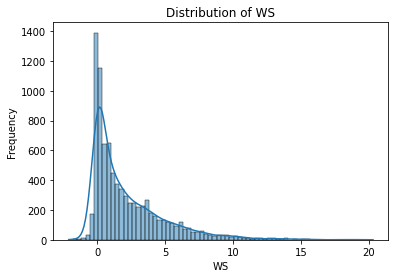

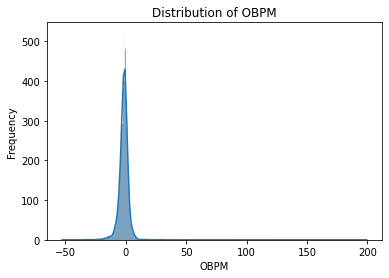

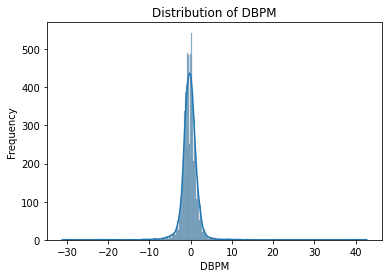

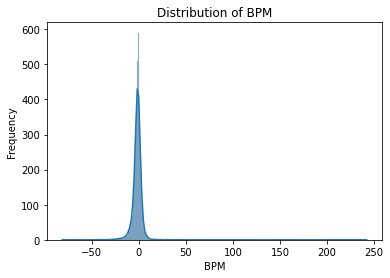

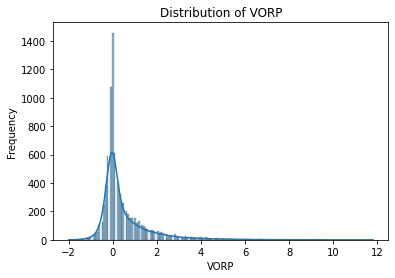

In [5]:
num_cols = player_stats.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    plt.figure()
    sns.histplot(player_stats[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

A lot of distributions are scaled right, so a standard scaling needs to be done before we perform pca. Now we will drop out all the rows with null values since we have enough samples.

In [6]:
player_stats_numerical = player_stats[num_cols]
player_stats_numerical = player_stats_numerical.dropna()
player_stats_numerical

,nbapersonid,draftyear,draftpick,season,nbateamid,games,games_start,mins,fgm,fga,...,blk_pct,tov_pct,usg,OWS,DWS,WS,OBPM,DBPM,BPM,VORP
0,2585,2003,42.0,2007,1610612737,62,5,944,107,245,...,0.010,0.181,0.183,0.2,0.9,1.1,-3.9,-1.3,-5.1,-0.7
1,200780,2006,33.0,2007,1610612737,35,0,145,12,30,...,0.026,0.221,0.156,-0.1,0.1,0.0,-6.7,-2.0,-8.8,-0.2
2,2746,2004,17.0,2007,1610612737,81,81,2873,518,1133,...,0.059,0.155,0.250,1.2,4.6,5.8,0.5,2.5,3.0,3.7
3,201151,2007,11.0,2007,1610612737,56,6,865,95,237,...,0.000,0.178,0.165,-0.5,0.4,-0.1,-4.2,-1.0,-5.2,-0.7
4,101136,2005,31.0,2007,1610612737,35,0,402,65,180,...,0.009,0.094,0.252,0.1,0.1,0.3,-1.0,-2.5,-3.5,-0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8486,1628993,2018,50.0,2021,1610612764,3,0,18,2,6,...,0.000,0.318,0.233,-0.1,0.0,-0.1,-7.7,-8.3,-16.1,-0.1
8488,1630557,2021,15.0,2021,1610612764,77,36,1801,234,514,...,0.010,0.085,0.146,1.6,0.7,2.3,-0.8,-1.5,-2.3,-0.1
8489,1628398,2017,27.0,2021,1610612764,66,66,2204,423,936,...,0.022,0.141,0.242,0.0,2.0,2.0,0.2,-0.4,-0.2,1.0
8490,203526,2013,47.0,2021,1610612764,70,19,1372,204,441,...,0.002,0.139,0.184,0.7,0.8,1.5,-2.5,-0.5,-3.0,-0.4


We will standard scale the dataset before performing PCA.

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
player_stats_scaled = scaler.fit_transform(player_stats_numerical)

In [8]:
from sklearn.decomposition import PCA
pca = PCA(0.90)
principalComponents = pca.fit_transform(player_stats_scaled)
principalDf_player_stats = pd.DataFrame(data=principalComponents)
principalDf_player_stats

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-1.828212,2.705753,3.385849,0.773161,0.580491,-0.751676,1.613696,0.403091,2.303953,0.915202,-0.288795,0.266030,-1.988328,1.410070
1,-5.488033,3.437324,3.431137,0.708104,1.445942,-0.569056,1.283915,-0.264432,2.769920,0.693988,1.368407,1.189556,-1.526734,1.312557
2,10.160337,3.375702,3.708541,0.768320,-0.352943,2.172077,-1.418908,-0.617255,0.758799,-1.228628,0.566693,-2.816904,2.703449,2.595093
3,-3.674547,-2.017336,2.201768,1.028007,-0.339785,0.423985,1.474618,-1.013138,0.950304,-1.052985,-0.842955,-1.001536,-0.384099,-0.219605
4,-4.150817,-2.333784,1.054434,0.671549,0.122847,-2.633569,-0.021639,-0.015167,1.540150,-0.193025,-0.385007,-0.918145,0.764682,0.847164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5838,-7.064305,6.683236,3.720095,-4.459580,6.450063,-0.710086,1.915699,-2.445465,-0.084775,5.041898,0.317827,7.225778,-0.611721,-0.132015
5839,-0.328535,-1.135650,-2.679930,-3.952752,-0.906341,0.199945,1.021172,0.745689,-0.958832,-0.652260,0.371336,-0.071273,-0.728108,-0.787233
5840,4.254203,0.320018,-0.679873,-3.712773,1.393657,1.023572,-0.193312,-0.796487,-1.647821,1.050216,0.581315,0.753500,0.245472,0.835836
5841,-0.927213,-1.794553,-0.570101,-0.445969,0.216792,1.461242,1.748984,1.400566,-0.992058,0.619003,-0.642143,0.087016,0.065490,0.010883


We will then take a look at the explained variance to see how much variance each principal component captures. Then we will choose accordingly in the part where we perform unsupervised learning.

In [9]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance: {explained_variance}")

Explained Variance: [0.41526124 0.13005122 0.06734643 0.05357613 0.04511033 0.04234973
 0.02886738 0.02362587 0.02127969 0.01876178 0.01735063 0.01657183
 0.01492322 0.01414716]


We will then perform the same process for the rest of the three datasets, including awards_data.csv, team_rebounding_data_22.csv, and team_stats.csv.

In [10]:
awards_data = pd.read_csv('awards_data.csv')

In [11]:
awards_data.head()

,season,nbapersonid,All NBA Defensive First Team,All NBA Defensive Second Team,All NBA First Team,All NBA Second Team,All NBA Third Team,All Rookie First Team,All Rookie Second Team,Bill Russell NBA Finals MVP,...,all_star_game,rookie_all_star_game,allstar_rk,Defensive Player Of The Year_rk,Most Improved Player_rk,Most Valuable Player_rk,Rookie Of The Year_rk,Sixth Man Of The Year_rk,all_nba_points_rk,all_rookie_points_rk
0,2007,708.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,True,False,1.0,1.0,NaN,3.0,NaN,NaN,NaN,NaN
1,2007,947.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007,948.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2007,959.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,True,False,4.0,NaN,NaN,9.0,NaN,NaN,NaN,NaN
4,2007,977.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,True,False,1.0,5.0,NaN,1.0,NaN,NaN,NaN,NaN


In [12]:
awards_data.describe()

,season,nbapersonid,All NBA Defensive First Team,All NBA Defensive Second Team,All NBA First Team,All NBA Second Team,All NBA Third Team,All Rookie First Team,All Rookie Second Team,Bill Russell NBA Finals MVP,...,Player Of The Week,Rookie Of The Month,allstar_rk,Defensive Player Of The Year_rk,Most Improved Player_rk,Most Valuable Player_rk,Rookie Of The Year_rk,Sixth Man Of The Year_rk,all_nba_points_rk,all_rookie_points_rk
count,4329.000000,4.321000e+03,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,...,693.000000,693.000000,3691.000000,255.000000,400.000000,202.000000,123.000000,237.000000,394.000000,266.000000
mean,2016.687688,1.622733e+06,0.109668,0.108225,0.108225,0.108225,0.108225,0.111111,0.109668,0.021645,...,0.940837,0.233766,58.173124,9.258824,13.540000,7.207921,4.853659,8.177215,18.390863,12.409774
std,3.781453,4.221668e+07,0.312701,0.310889,0.310889,0.310889,0.310889,0.314497,0.312701,0.145627,...,1.175727,0.790231,40.466750,5.409571,7.675329,3.915315,2.804221,4.468608,10.581058,7.031019
min,2007.000000,2.550000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2015.000000,2.015650e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,20.000000,5.000000,7.000000,4.000000,3.000000,4.000000,9.000000,6.250000
50%,2018.000000,2.034710e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,56.000000,9.000000,13.000000,7.000000,5.000000,8.000000,18.000000,13.000000
75%,2020.000000,1.627885e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,92.000000,13.000000,20.000000,10.000000,7.000000,11.000000,27.000000,18.000000
max,2021.000000,1.962937e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,7.000000,6.000000,157.000000,25.000000,30.000000,17.000000,13.000000,18.000000,41.000000,26.000000


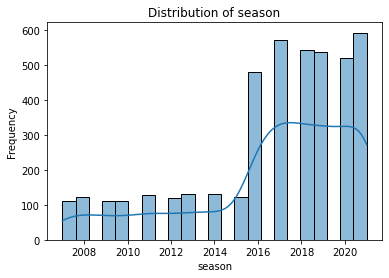

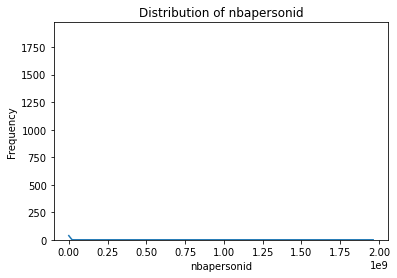

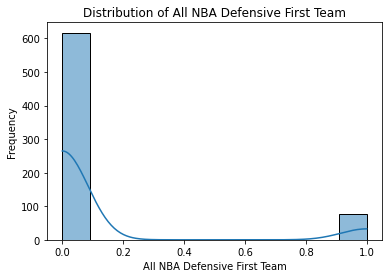

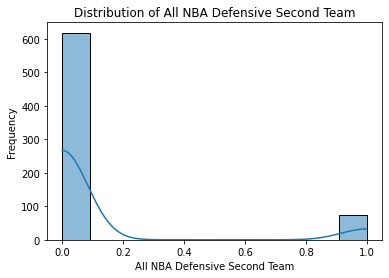

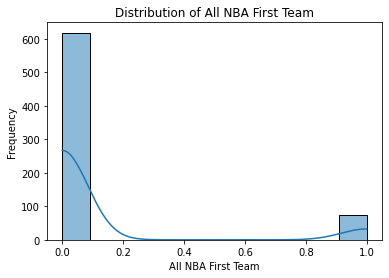

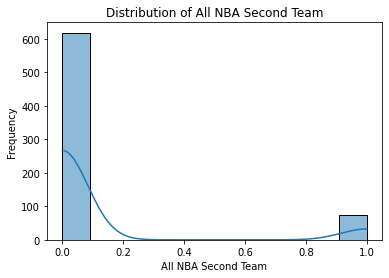

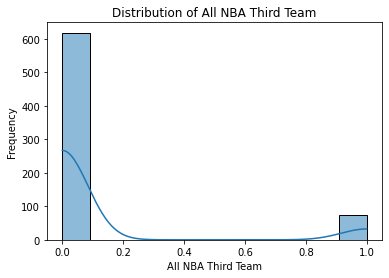

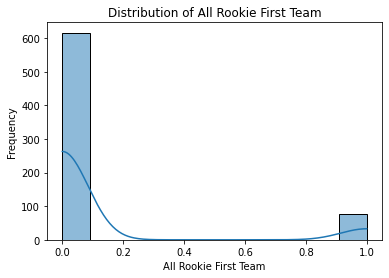

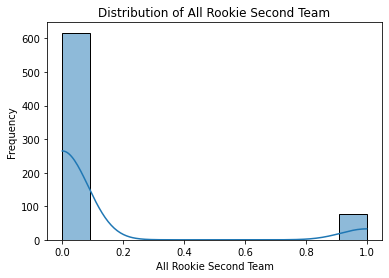

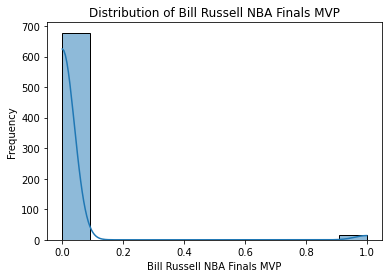

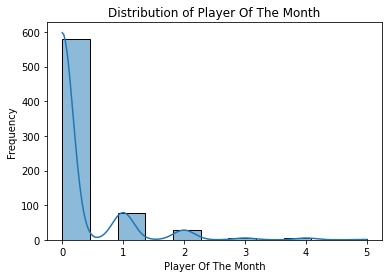

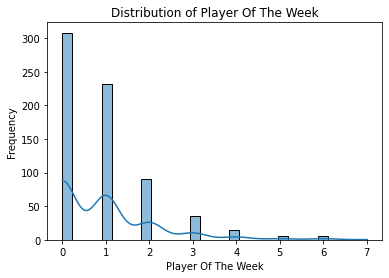

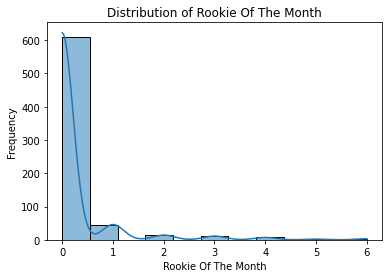

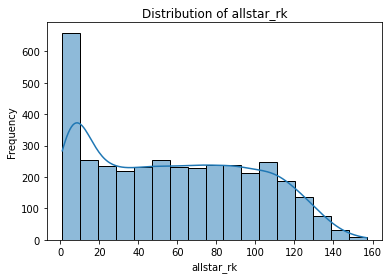

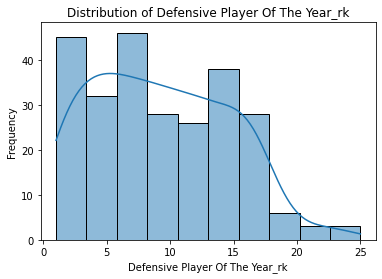

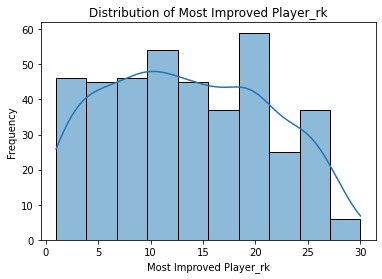

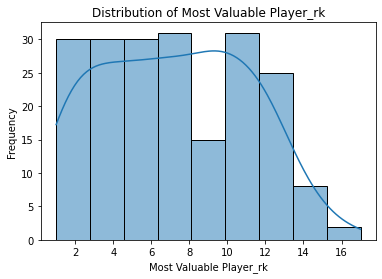

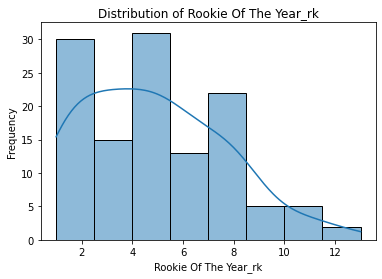

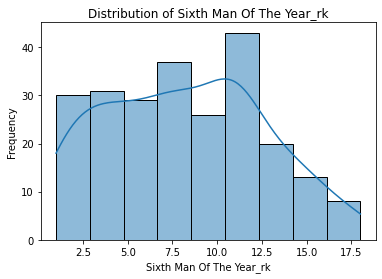

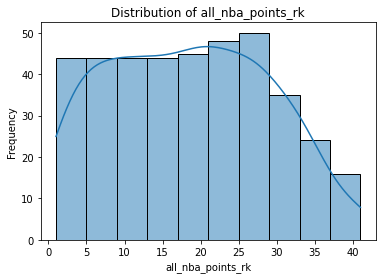

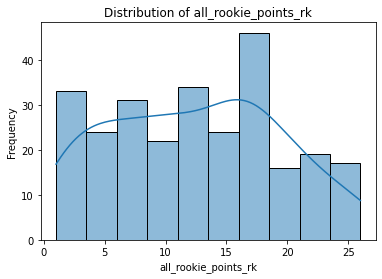

In [13]:
num_cols = awards_data.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    plt.figure()
    sns.histplot(awards_data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

A lot of these distributions are binary or highly skewed right because awards are difficult to obtain. We will perform the same standardizing method to preprocess the data for PCA. 

Columns with null values will be dropped since some columns include a lot of null values.

In [14]:
awards_data_numerical = awards_data[num_cols]
awards_data_numerical_cleaned = awards_data_numerical.dropna(axis=1)
awards_data_numerical_cleaned

,season
0,2007
1,2007
2,2007
3,2007
4,2007
...,...
4324,2015
4325,2015
4326,2015
4327,2018


It seems like almost every column has some null values. We will check to see which columns have the most null values and take them out as a part of our feature selection process.

In [15]:
null_counts = awards_data_numerical.isnull().sum()
print(null_counts)

season                                0
nbapersonid                           8
All NBA Defensive First Team       3636
All NBA Defensive Second Team      3636
All NBA First Team                 3636
All NBA Second Team                3636
All NBA Third Team                 3636
All Rookie First Team              3636
All Rookie Second Team             3636
Bill Russell NBA Finals MVP        3636
Player Of The Month                3636
Player Of The Week                 3636
Rookie Of The Month                3636
allstar_rk                          638
Defensive Player Of The Year_rk    4074
Most Improved Player_rk            3929
Most Valuable Player_rk            4127
Rookie Of The Year_rk              4206
Sixth Man Of The Year_rk           4092
all_nba_points_rk                  3935
all_rookie_points_rk               4063
dtype: int64


There are way too many null values to get reasonable results for this dataset. We will proceed to the next one.

In [16]:
team_rebounding_data_22 = pd.read_csv('team_rebounding_data_22.csv')

In [17]:
team_rebounding_data_22.head()

,team,opp_team,gamedate,game_number,offensive_rebounds,off_rebound_chances,oreb_pct
0,BOS,PHI,2022-10-18,1,10,39,0.256410
1,PHI,BOS,2022-10-18,1,8,42,0.190476
2,GSW,LAL,2022-10-18,1,16,57,0.280702
3,LAL,GSW,2022-10-18,1,14,57,0.245614
4,ORL,DET,2022-10-19,1,13,47,0.276596


In [18]:
team_rebounding_data_22.describe()

,game_number,offensive_rebounds,off_rebound_chances,oreb_pct
count,2460.000000,2460.000000,2460.000000,2460.000000
mean,41.500000,13.741057,48.921138,0.277861
std,23.674413,4.643713,7.142900,0.075100
min,1.000000,1.000000,28.000000,0.033333
25%,21.000000,10.000000,44.000000,0.225000
50%,41.500000,13.000000,49.000000,0.277778
75%,62.000000,17.000000,53.000000,0.333333
max,82.000000,30.000000,81.000000,0.547170


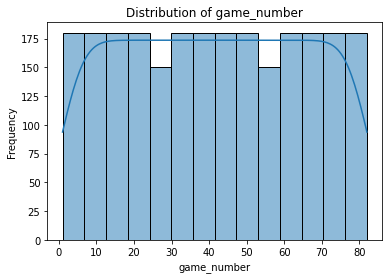

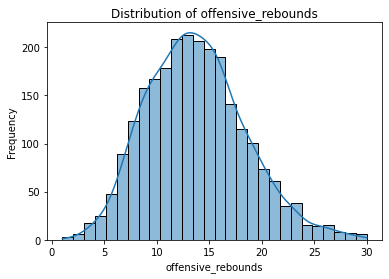

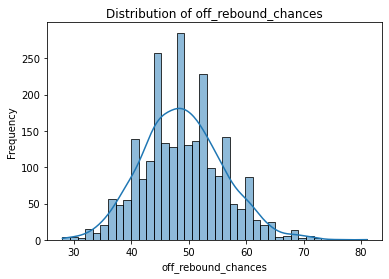

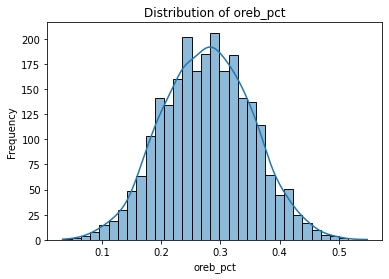

In [19]:
num_cols = team_rebounding_data_22.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    plt.figure()
    sns.histplot(team_rebounding_data_22[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [20]:
team_rebounding_data_22_numerical = team_rebounding_data_22[num_cols]
team_rebounding_data_22_cleaned = team_rebounding_data_22_numerical.dropna()
team_rebounding_data_22_cleaned

,game_number,offensive_rebounds,off_rebound_chances,oreb_pct
0,1,10,39,0.256410
1,1,8,42,0.190476
2,1,16,57,0.280702
3,1,14,57,0.245614
4,1,13,47,0.276596
...,...,...,...,...
2455,82,18,56,0.321429
2456,82,12,55,0.218182
2457,82,11,61,0.180328
2458,82,12,50,0.240000


PCA won't be necessary for this dataset because there is only four features. We will proceed to our next dataset.

In [21]:
team_stats = pd.read_csv('team_stats.csv')

In [22]:
team_stats.head()

,nbateamid,team,season,games,off_rtg,def_rtg,net_rtg,W,L
0,1610612737,ATL,2007,82,106.9,108.9,-2.0,37,45
1,1610612751,BKN,2007,82,104.0,109.4,-5.4,34,48
2,1610612738,BOS,2007,82,110.2,98.9,11.3,66,16
3,1610612766,CHA,2007,82,104.6,109.4,-4.8,32,50
4,1610612741,CHI,2007,82,103.9,107.2,-3.3,33,49


In [23]:
team_stats.describe()

,nbateamid,season,games,off_rtg,def_rtg,net_rtg,W,L
count,4.500000e+02,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,1.610613e+09,2014.000000,79.502222,108.156000,108.156889,-0.000889,39.751111,39.751111
std,8.665075e+00,4.325302,5.190041,3.966808,3.679923,4.955616,12.572119,12.445348
min,1.610613e+09,2007.000000,64.000000,95.200000,98.200000,-15.200000,7.000000,9.000000
25%,1.610613e+09,2010.000000,82.000000,105.300000,105.600000,-3.500000,30.250000,30.000000
50%,1.610613e+09,2014.000000,82.000000,108.100000,108.200000,0.200000,41.000000,39.000000
75%,1.610613e+09,2018.000000,82.000000,111.100000,110.775000,3.600000,49.000000,49.000000
max,1.610613e+09,2021.000000,82.000000,118.300000,117.600000,11.600000,73.000000,72.000000


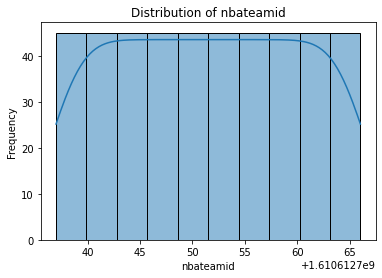

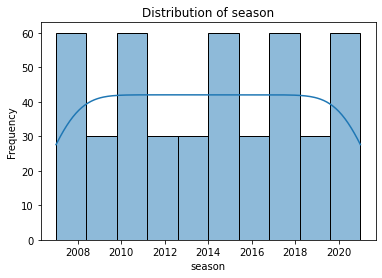

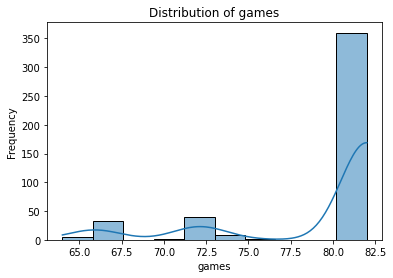

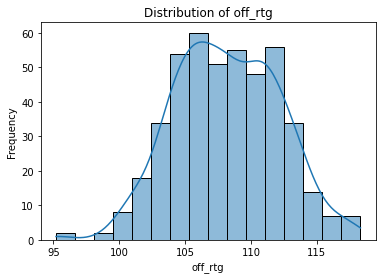

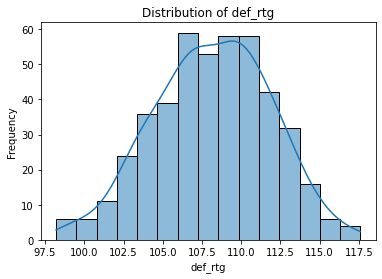

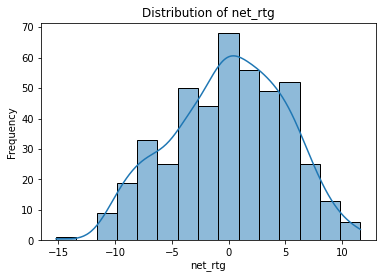

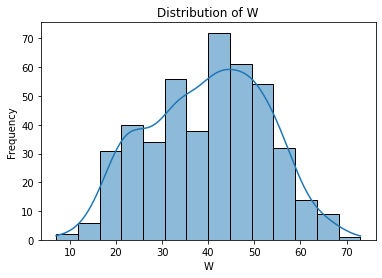

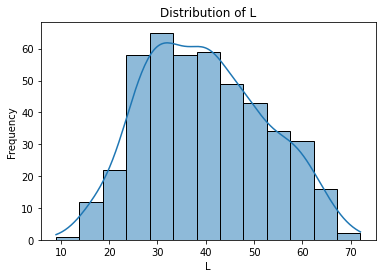

In [24]:
num_cols = team_stats.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    plt.figure()
    sns.histplot(team_stats[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

We will drop the column for nabateamid since this only represents the id and has very little meaning.

In [25]:
team_stats_numerical = team_stats[num_cols]
team_stats_numerical_cleaned = team_stats_numerical.dropna(axis=0)
team_stats_numerical_cleaned = team_stats_numerical_cleaned.drop('nbateamid', axis=1)

In [26]:
team_stats_numerical_cleaned

,season,games,off_rtg,def_rtg,net_rtg,W,L
0,2007,82,106.9,108.9,-2.0,37,45
1,2007,82,104.0,109.4,-5.4,34,48
2,2007,82,110.2,98.9,11.3,66,16
3,2007,82,104.6,109.4,-4.8,32,50
4,2007,82,103.9,107.2,-3.3,33,49
...,...,...,...,...,...,...,...
445,2021,82,109.9,115.3,-5.4,30,52
446,2021,82,112.4,112.3,0.1,34,48
447,2021,82,112.9,110.5,2.4,48,34
448,2021,82,116.7,110.5,6.2,49,33


In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
team_stats_scaled = scaler.fit_transform(team_stats_numerical_cleaned)

In [28]:
from sklearn.decomposition import PCA
pca = PCA(0.90)
principalComponents = pca.fit_transform(team_stats_scaled)
principalDf_team_stats= pd.DataFrame(data=principalComponents)
principalDf_team_stats

,0,1,2
0,0.696132,-1.243956,-0.414608
1,1.593966,-1.522958,-0.293025
2,-4.183510,-2.251320,0.193472
3,1.639678,-1.451276,-0.332764
4,1.276627,-1.845750,-0.132238
...,...,...,...
445,1.898899,2.129060,-1.160920
446,0.523105,2.007331,-1.077594
447,-1.046783,1.816856,-0.938771
448,-1.861995,2.274198,-1.153095


In [29]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance: {explained_variance}")

Explained Variance: [0.52707907 0.24587635 0.15100354]
